# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Suppressing unnecessary warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
# Reading the dataset from a CSV file into a DataFrame
df = pd.read_csv('fixed_values_ds.csv')

# Displaying the first 5 rows of the DataFrame
df.head()

,having_ip_address,length_of_url,shortening_services,having_at_symbol,double-slash_redirection,prefix and suffix,sub_domains,ssl_state,domain_registered,favicons,...,on_mouse_over,right_click,popup_windows,domain_age,dns_record,web_traffic,links_pointing,statistical_report,image_text_keyword,result
0,-1,-1,-1,-1,-1,-1,1,1,1,1,...,1,1,1,1,1,1,1,-1,-1,1
1,-1,0,-1,-1,-1,1,0,-1,1,1,...,-1,-1,-1,-1,1,1,-1,-1,1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,1,1,-1,-1,1,1
3,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,1,0,-1,-1,1,1
4,-1,1,-1,-1,-1,1,1,-1,1,1,...,-1,-1,-1,1,1,-1,-1,-1,-1,1


# Exploring Dataset

In [4]:
# Displaying the dimensions (number of rows and columns) of the DataFrame
df.shape

(14093, 29)

In [5]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14093 entries, 0 to 14092
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   having_ip_address         14093 non-null  int64
 1   length_of_url             14093 non-null  int64
 2   shortening_services       14093 non-null  int64
 3   having_at_symbol          14093 non-null  int64
 4   double-slash_redirection  14093 non-null  int64
 5   prefix and suffix         14093 non-null  int64
 6   sub_domains               14093 non-null  int64
 7   ssl_state                 14093 non-null  int64
 8   domain_registered         14093 non-null  int64
 9   favicons                  14093 non-null  int64
 10  ports                     14093 non-null  int64
 11  https                     14093 non-null  int64
 12  external_objects          14093 non-null  int64
 13  anchor_tags               14093 non-null  int64
 14  links_in_tags             14093 non-nu

In [6]:
# Displaying descriptive statistics of the DataFrame's numerical columns
df.describe()

,having_ip_address,length_of_url,shortening_services,having_at_symbol,double-slash_redirection,prefix and suffix,sub_domains,ssl_state,domain_registered,favicons,...,on_mouse_over,right_click,popup_windows,domain_age,dns_record,web_traffic,links_pointing,statistical_report,image_text_keyword,result
count,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,...,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000
mean,-0.994891,-0.199674,-0.823033,-0.983538,-0.994040,-0.612148,0.344568,0.160009,0.783155,0.743135,...,0.152345,0.151210,0.178599,0.439296,0.793515,0.123891,0.595757,-0.531257,0.718016,0.000355
std,0.100958,0.874794,0.568014,0.180708,0.109024,0.790771,0.688640,0.987151,0.621849,0.669165,...,0.988362,0.988537,0.983957,0.898374,0.608573,0.954012,0.774085,0.847241,0.696051,1.000035
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
75%,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Displaying the number of unique values in each column of the DataFrame
df.nunique()

having_ip_address           2
length_of_url               3
shortening_services         2
having_at_symbol            2
double-slash_redirection    2
prefix and suffix           2
sub_domains                 3
ssl_state                   2
domain_registered           2
favicons                    2
ports                       2
https                       2
external_objects            3
anchor_tags                 3
links_in_tags               3
sfh-domain                  3
auto_email                  2
abnoramal_url               2
iframe_redirection          2
on_mouse_over               2
right_click                 2
popup_windows               2
domain_age                  2
dns_record                  2
web_traffic                 3
links_pointing              3
statistical_report          2
image_text_keyword          2
result                      2
dtype: int64

# Cleaning Dataset

In [8]:
# Checking for missing values and displaying the sum of null values for each column
df.isnull().sum()

having_ip_address           0
length_of_url               0
shortening_services         0
having_at_symbol            0
double-slash_redirection    0
prefix and suffix           0
sub_domains                 0
ssl_state                   0
domain_registered           0
favicons                    0
ports                       0
https                       0
external_objects            0
anchor_tags                 0
links_in_tags               0
sfh-domain                  0
auto_email                  0
abnoramal_url               0
iframe_redirection          0
on_mouse_over               0
right_click                 0
popup_windows               0
domain_age                  0
dns_record                  0
web_traffic                 0
links_pointing              0
statistical_report          0
image_text_keyword          0
result                      0
dtype: int64

# Visualizing Data

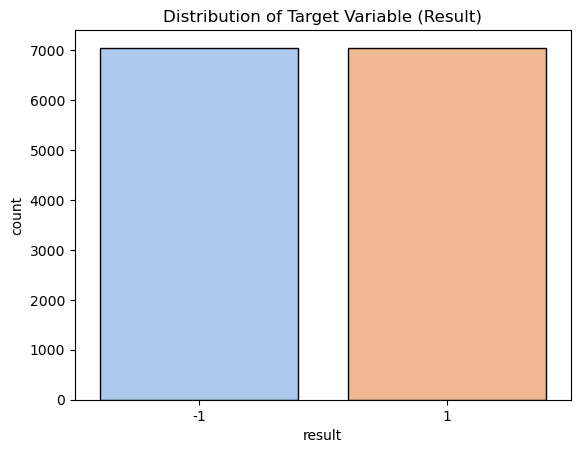

The graph shows that the data is equally divided to identify harmful and harmless URLs.


In [9]:
# Visualizing the distribution of the target variable 'result'
color = sns.color_palette("pastel", 2)
sns.countplot(x='result', data=df, palette = color, edgecolor='black')
plt.title('Distribution of Target Variable (Result)')
plt.show()

print('The graph shows that the data is equally divided to identify harmful and harmless URLs.')

array([[<AxesSubplot:title={'center':'having_ip_address'}>,
        <AxesSubplot:title={'center':'length_of_url'}>,
        <AxesSubplot:title={'center':'shortening_services'}>,
        <AxesSubplot:title={'center':'having_at_symbol'}>,
        <AxesSubplot:title={'center':'double-slash_redirection'}>],
       [<AxesSubplot:title={'center':'prefix and suffix'}>,
        <AxesSubplot:title={'center':'sub_domains'}>,
        <AxesSubplot:title={'center':'ssl_state'}>,
        <AxesSubplot:title={'center':'domain_registered'}>,
        <AxesSubplot:title={'center':'favicons'}>],
       [<AxesSubplot:title={'center':'ports'}>,
        <AxesSubplot:title={'center':'https'}>,
        <AxesSubplot:title={'center':'external_objects'}>,
        <AxesSubplot:title={'center':'anchor_tags'}>,
        <AxesSubplot:title={'center':'links_in_tags'}>],
       [<AxesSubplot:title={'center':'sfh-domain'}>,
        <AxesSubplot:title={'center':'auto_email'}>,
        <AxesSubplot:title={'center':'abnoram

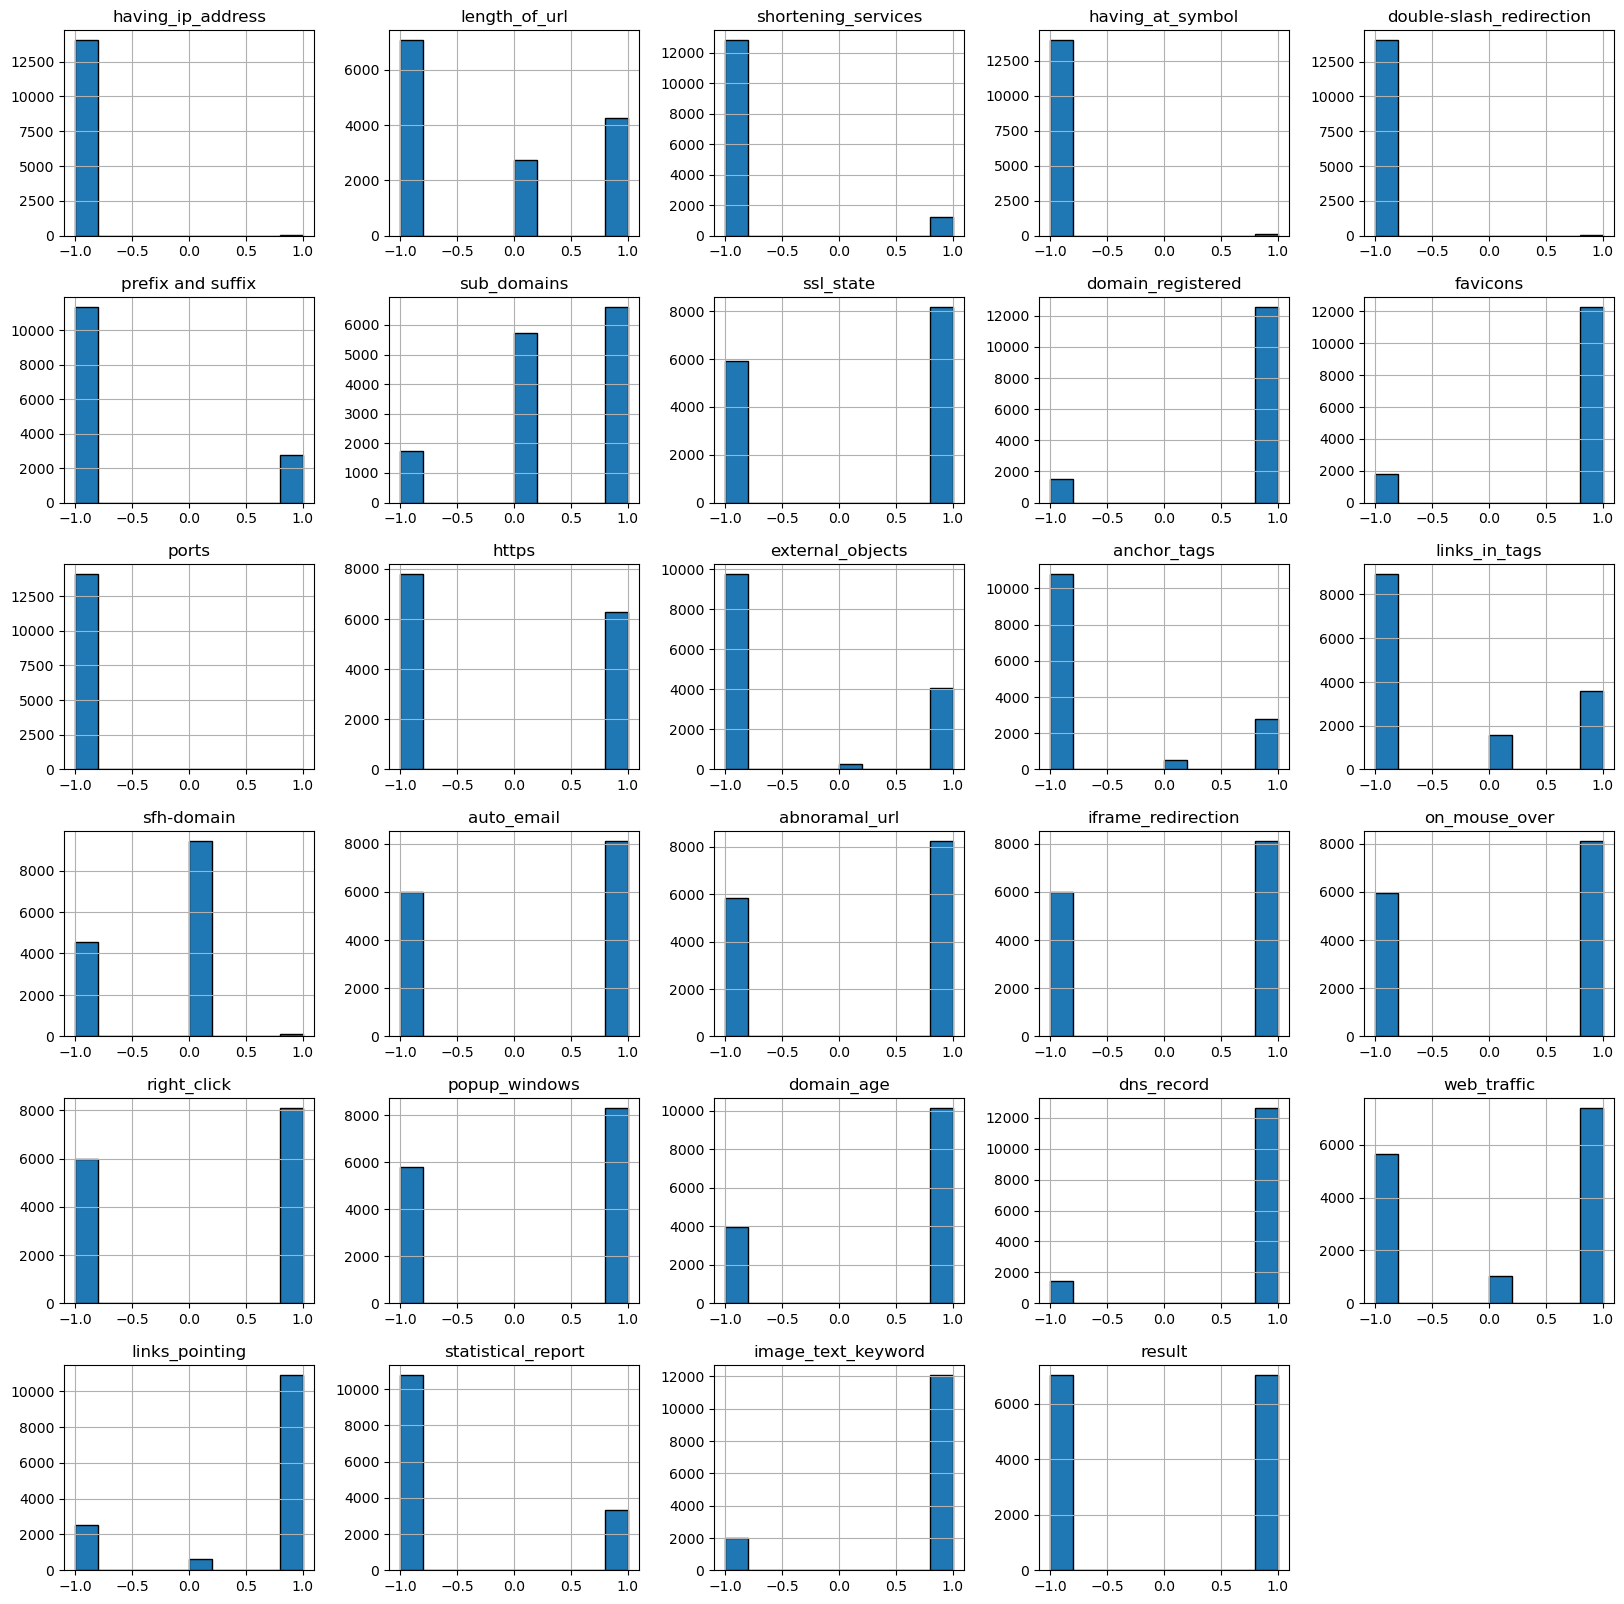

In [10]:
# Plotting histograms for each column in the DataFrame
df.hist(edgecolor='black', figsize=(20,20))

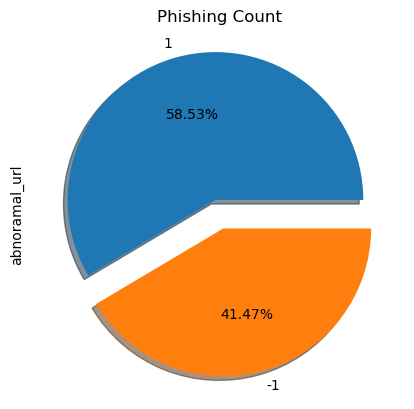

The chart shows that the dataset consists of higher number of fradulent URLs.


In [11]:
# Plotting a pie chart for the 'abnoramal_url' column
df['abnoramal_url'].value_counts().plot(kind='pie',explode = [0.1, 0.1], autopct='%1.2f%%', shadow = True)
plt.title("Phishing Count")
plt.show()

print("The chart shows that the dataset consists of higher number of fradulent URLs.")

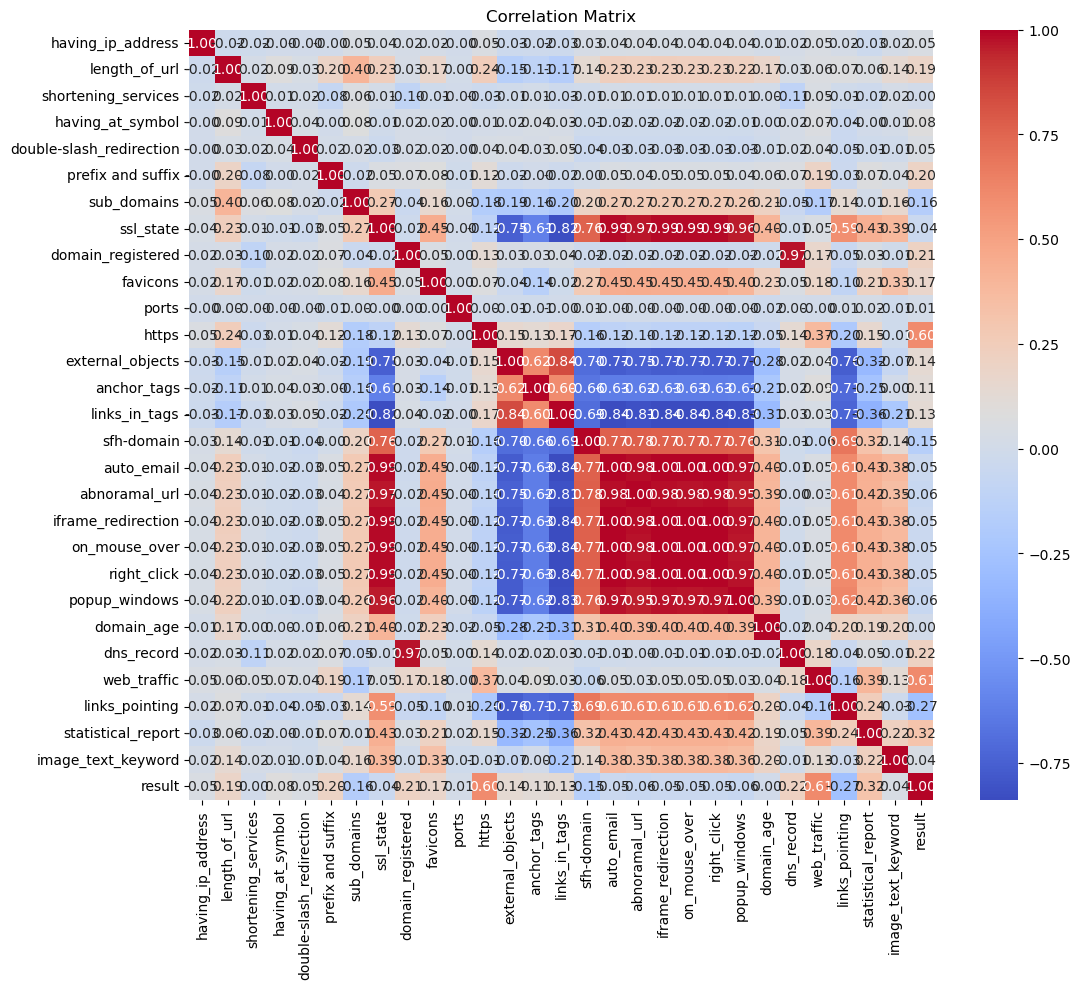

In [12]:
# Visualizing the correlation matrix to understand relationships between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

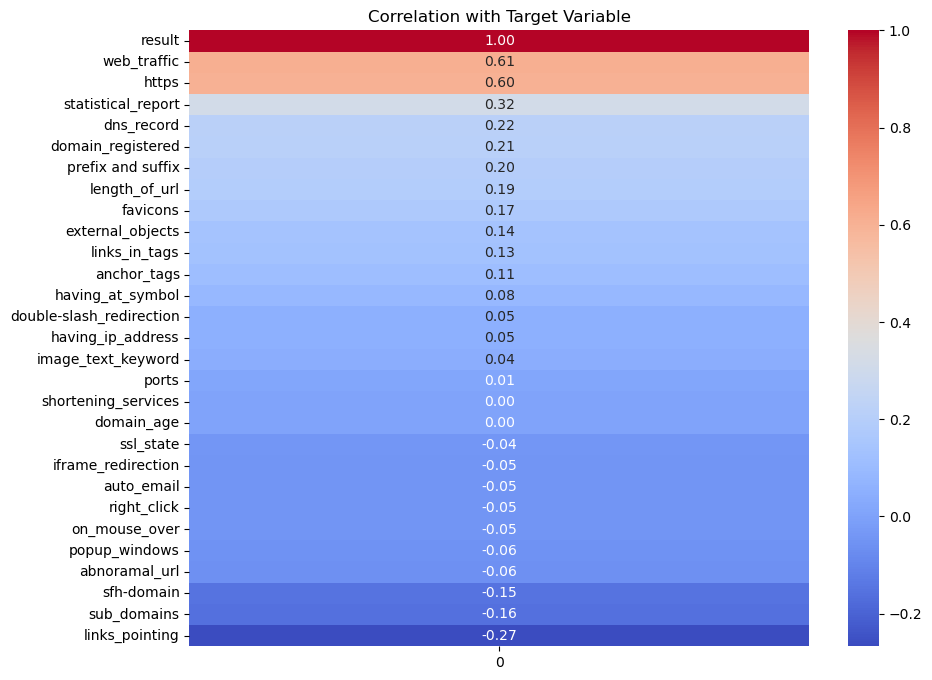

The correlation shows that "web_taffic" and "https" are closely related to finding out whether the URL is harmful or not.


In [13]:
# Calculating correlation of each feature with the target variable 'result'
corr_with_target = df.corrwith(df['result'])

# Plotting a heatmap to visualize the correlation with the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target.sort_values(ascending=False).to_frame(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation with Target Variable')
plt.show()

print('The correlation shows that "web_taffic" and "https" are closely related to finding out whether the URL is harmful or not.')

As shown in the graph, most of the URLs have a long length which shows that there are a lot of fradulent URLs.


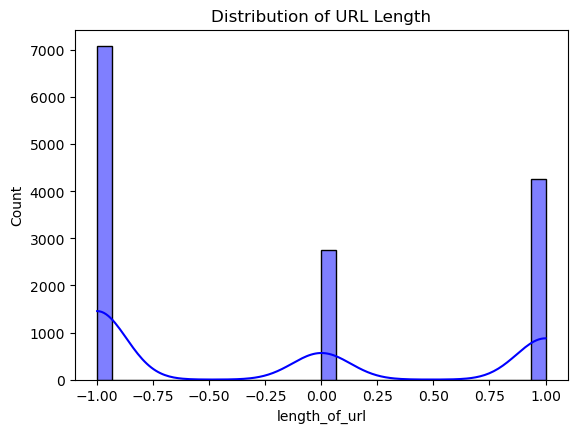

In [14]:
# Visualizing the distribution of URL Length using a histogram
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['length_of_url'], bins=30, kde=True, color='blue')
plt.title('Distribution of URL Length')

print('As shown in the graph, most of the URLs have a long length which shows that there are a lot of fradulent URLs.')

# Splitting the Data

In [15]:
# Separating features (x) and target variable (y)
x = df.drop(["result"], axis = 1)
y = df["result"]

In [16]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [17]:
# Displaying the shapes of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11274, 28), (2819, 28), (11274,), (2819,))

# K-Nearest Neighbours

In [18]:
# Initializing knn classifier
knn_model = KNeighborsClassifier()

# Defining grid of hyperparameter values to search5
knn_params = {'n_neighbors': [3, 5, 7, 9, 11, 13]}

# Using grid search to find the best hyperparameters
knn_grid_search = GridSearchCV(knn_model, knn_params, refit = True, cv = 5, scoring = 'accuracy')

In [19]:
# Fitting the knn grid search
knn_grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
knn_best_params = knn_grid_search.best_params_
print("KNN Best Hyperparameter: ", knn_best_params)

# Getting the best cross-validated score for the KNN model
knn_best_score = knn_grid_search.best_score_
print("KNN Best Score: ", knn_best_score)

KNN Best Hyperparameter:  {'n_neighbors': 11}
KNN Best Score:  0.907663144309107


In [20]:
# Creating a new KNN model with the best hyperparameter
knn_best_model = KNeighborsClassifier(n_neighbors=list(knn_best_params.values())[0])

# Fitting the best KNN model with the training data
knn_best_model.fit(x_train, y_train)

# Predicting using the test dataset with the best model
knn_y_pred = knn_best_model.predict(x_test)

In [21]:
# Calculating and printing the accuracy of the KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy : {knn_accuracy: .3f}")

# Calculating and printing the precision of the KNN model
knn_precision = precision_score(y_test, knn_y_pred)
print(f"KNN Precision : {knn_precision: .3f}")

# Calculating and printing the recall of the KNN model
knn_recall = recall_score(y_test, knn_y_pred)
print(f"KNN Recall : {knn_recall: .3f}")

# Calculating and printing the f1 score of the KNN model
knn_f1 = f1_score(y_test, knn_y_pred)
print(f"KNN F1 score : {knn_f1: .3f}")

# Calculating and printing the error of the KNN model
knn_error = 1 - knn_accuracy
print(f"KNN Error: {knn_error: .3f}")

KNN Accuracy :  0.909
KNN Precision :  0.902
KNN Recall :  0.918
KNN F1 score :  0.910
KNN Error:  0.091


In [22]:
# Calculating and printing the confusion matrix of the KNN model
knn_con_matrix = confusion_matrix(y_test, knn_y_pred)
print(f"KNN Confusion Matrix : \n{knn_con_matrix}")

KNN Confusion Matrix : 
[[1260  141]
 [ 116 1302]]


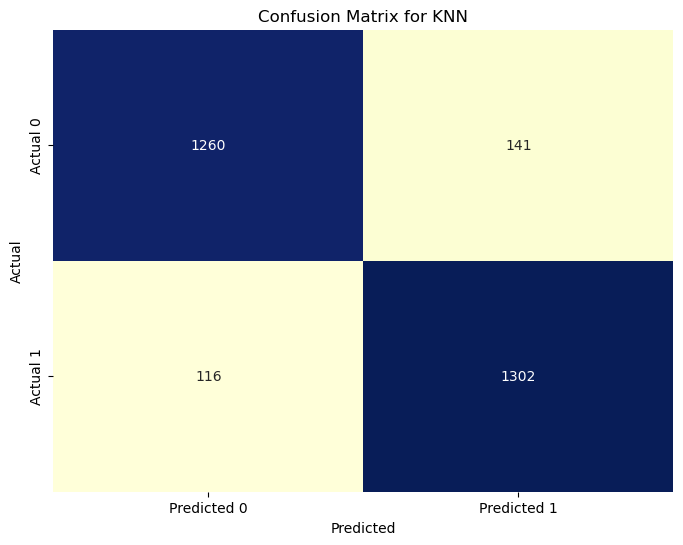

In [23]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_con_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gaussian Naive Bayes

In [24]:
# Initializing Gaussian Naive Bayes (NB) model
nb_model = GaussianNB()

# Defining the hyperparameter grid for NB
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Creating RepeatedStratifiedKFold cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Defining scoring metric as accuracy
scorer = make_scorer(accuracy_score)

# Performing GridSearchCV for hyperparameter tuning for NB
nb_grid_search = GridSearchCV(nb_model, nb_param_grid, scoring=scorer, cv=cv)

In [25]:
# Fitting the model to find the best hyperparameters
nb_grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
nb_best_params = nb_grid_search.best_params_
print("Gaussian Naive Bayes Best Hyperparameter:", nb_best_params)

# Getting the best cross-validated score 
nb_best_model = nb_grid_search.best_estimator_
print("Gaussian Naive Bayes Best Model:", nb_best_model)

Gaussian Naive Bayes Best Hyperparameter: {'var_smoothing': 1e-05}
Gaussian Naive Bayes Best Model: GaussianNB(var_smoothing=1e-05)


In [26]:
# Fitting the best Gaussian Naive Bayes (NB) model on the training data
nb_best_model.fit(x_train, y_train)

GaussianNB(var_smoothing=1e-05)

In [27]:
# Predicting using the test dataset with the best NB model
nb_y_pred = nb_best_model.predict(x_test)

In [28]:
# Calculating and printing the accuracy of the NB model
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Naive Bayes Accuracy : {nb_accuracy: .3f}")

# Calculating and printing the precision of the NB model
nb_precision = precision_score(y_test, nb_y_pred)
print(f"Naive Bayes Precision : {nb_precision: .3f}")

# Calculating and printing the recall of the NB model
nb_recall = recall_score(y_test, nb_y_pred)
print(f"Naive Bayes Recall : {nb_recall: .3f}")

# Calculating and printing the f1 score of the NB model
nb_f1 = f1_score(y_test, nb_y_pred)
print(f"Naive Bayes F1 score : {nb_f1: .3f}")

# Calculating and printing the error of the NB model
nb_error = 1 - nb_accuracy
print(f"Naive Bayes Error: {nb_error: .3f}")

Naive Bayes Accuracy :  0.576
Naive Bayes Precision :  0.937
Naive Bayes Recall :  0.168
Naive Bayes F1 score :  0.285
Naive Bayes Error:  0.424


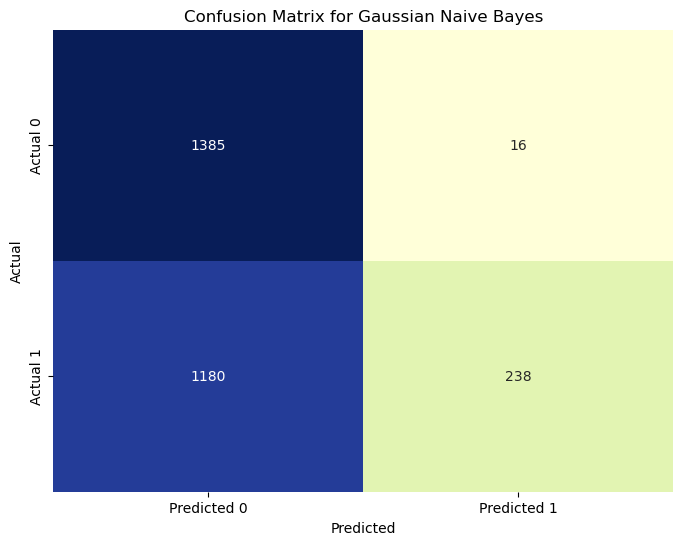

In [29]:
# Creating confusion matrix for NB
nb_con_matrix = confusion_matrix(y_test, nb_y_pred)

# Plotting the confusion matrix as a heatmap for NB
plt.figure(figsize=(8, 6))
sns.heatmap(nb_con_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

In [30]:
# Initializing Random Forest (RF) model
rf_model = RandomForestClassifier()

# Defining the hyperparameter grid for RF
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating GridSearchCV for hyperparameter tuning for RF
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')

In [31]:
# Fitting the random forest grid search
rf_grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
rf_best_params = rf_grid_search.best_params_
print("Random Forest Best Hyperparameter: ", rf_best_params)

# Getting the best cross-validated score 
rf_best_score = rf_grid_search.best_score_
print("Random Forest Best Score: ", rf_best_score)

Random Forest Best Hyperparameter:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Best Score:  0.9229191169382049


In [32]:
# Creating a Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=rf_best_params['n_estimators'],
    max_depth=rf_best_params['max_depth'],
    min_samples_split=rf_best_params['min_samples_split'],
    min_samples_leaf=rf_best_params['min_samples_leaf']
)

In [33]:
# Fitting the best Random Forest model on the training data
best_rf_model.fit(x_train, y_train)

# Predicting using the test dataset
rf_y_pred = best_rf_model.predict(x_test)

In [34]:
# Calculating and printing the accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy : {rf_accuracy: .3f}")

# Calculating and printing the precision of the Random Forest model
rf_precision = precision_score(y_test, rf_y_pred)
print(f"Random Forest Precision : {rf_precision: .3f}")

# Calculating and printing the recall of the Random Forest model
rf_recall = recall_score(y_test, rf_y_pred)
print(f"Random Forest Recall : {rf_recall: .3f}")

# Calculating and printing the f1 score of the Random Forest model
rf_f1 = f1_score(y_test, rf_y_pred)
print(f"Random Forest F1 score : {rf_f1: .3f}")

# Calculating and printing the error of the Random Forest model
rf_error = 1 - rf_accuracy
print(f"Random Forest Error: {rf_error: .3f}")

Random Forest Accuracy :  0.924
Random Forest Precision :  0.925
Random Forest Recall :  0.925
Random Forest F1 score :  0.925
Random Forest Error:  0.076


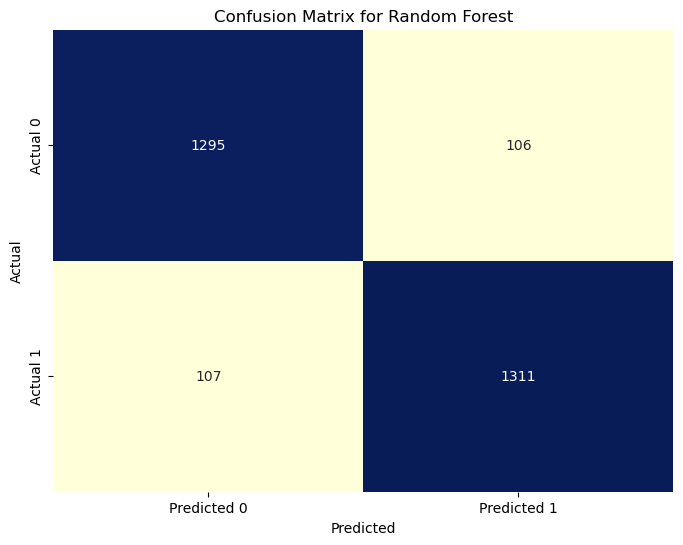

In [35]:
# Creating confusion matrix for Random Forest
rf_con_matrix = confusion_matrix(y_test, rf_y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_con_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine (SVM)

In [36]:
# Initializing SVM model
svm_model = SVC()

# Defining the hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Creating GridSearchCV for hyperparameter tuning for SVM
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy')

In [37]:
# Fitting the SVM grid search
svm_grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
svm_best_params = svm_grid_search.best_params_
print("SVM Best Hyperparameter: ", svm_best_params)

# Getting the best cross-validated score 
svm_best_score = svm_grid_search.best_score_
print("SVM Best Score: ", svm_best_score)

SVM Best Hyperparameter:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Score:  0.9207018220379831


In [38]:
# Creating an SVM model with the best hyperparameters
best_svm_model = SVC(
    C=svm_best_params['C'],
    kernel=svm_best_params['kernel'],
    gamma=svm_best_params['gamma']
)

In [39]:
# Fitting the best SVM model on the training data
best_svm_model.fit(x_train, y_train)

# Predicting using the test dataset
svm_y_pred = best_svm_model.predict(x_test)

In [40]:
# Calculating and printing the accuracy of the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy : {svm_accuracy: .3f}")

# Calculating and printing the precision of the SVM model
svm_precision = precision_score(y_test, svm_y_pred)
print(f"SVM Precision : {svm_precision: .3f}")

# Calculating and printing the recall of the SVM model
svm_recall = recall_score(y_test, svm_y_pred)
print(f"SVM Recall : {svm_recall: .3f}")

# Calculating and printing the f1 score of the SVM model
svm_f1 = f1_score(y_test, svm_y_pred)
print(f"SVM F1 score : {svm_f1: .3f}")

# Calculating and printing the error of the SVM model
svm_error = 1 - svm_accuracy
print(f"SVM Error: {svm_error: .3f}")

SVM Accuracy :  0.920
SVM Precision :  0.914
SVM Recall :  0.929
SVM F1 score :  0.921
SVM Error:  0.080


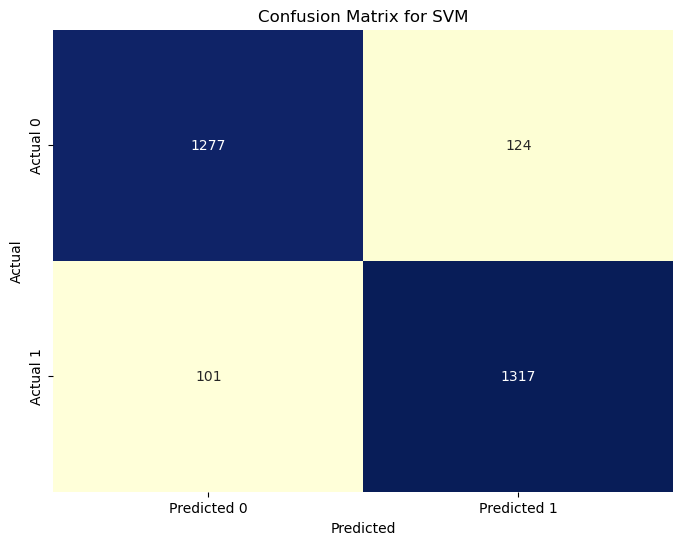

In [41]:
# Creating confusion matrix
svm_con_matrix = confusion_matrix(y_test, svm_y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_con_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Report

In [42]:
# Defining dictionary containing performance metrics for different algorithms
data = {
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_error],
    'Naive Bayes': [nb_accuracy, nb_precision, nb_recall, nb_f1, nb_error],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_error],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_error]
}

# Creating DataFrame
metrics_df = pd.DataFrame(data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Error'])
metrics_df

,KNN,Naive Bayes,Random Forest,SVM
Accuracy,0.908833,0.575736,0.924441,0.920184
Precision,0.902287,0.937008,0.925194,0.913949
Recall,0.918195,0.167842,0.924542,0.928773
F1 Score,0.910171,0.284689,0.924868,0.921301
Error,0.091167,0.424264,0.075559,0.079816


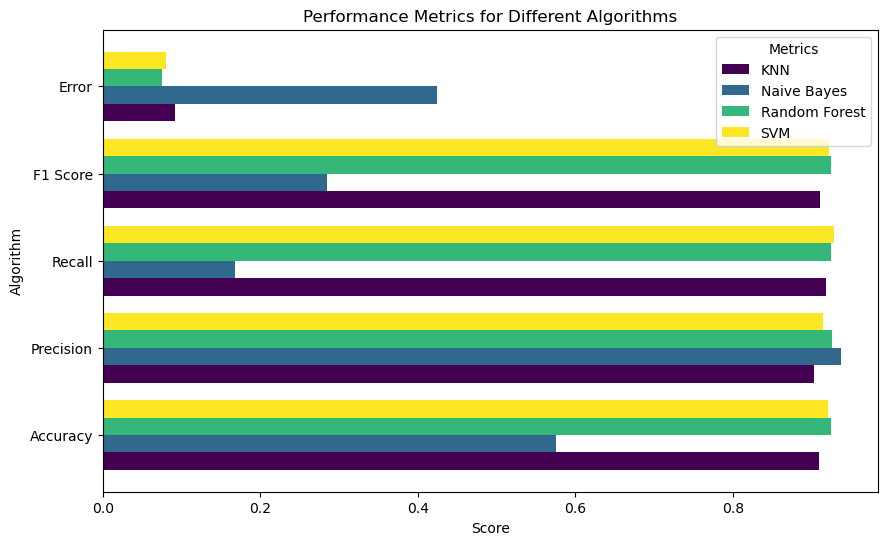

In [43]:
# Plotting horizontal bar graph
metrics_df.plot(kind='barh', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Performance Metrics for Different Algorithms')
plt.xlabel('Score')
plt.ylabel('Algorithm')
plt.legend(title='Metrics')
plt.show()